In [1]:
import pandas as pd
import numpy as np
import pylab as plt

In [2]:
ssp_paths = pd.read_csv(r'/shared/netscratch/znjs2/SSP_RCP_ch4/ssp_paths.csv',sep=',',index_col=0)
ssp_paths.columns = ['SSP_1','SSP_2','SSP_3','SSP_4','SSP_5']

In [39]:
ch4_obs = pd.read_csv(r'/shared/netscratch/znjs2/SSP_RCP_ch4/noaa_ch4.csv',sep=',')
print(ch4_obs[:5])

   year  month   decimal  average  average_unc   trend  trend_unc
0  1983      7  1983.542   1625.9          2.5  1634.7        1.6
1  1983      8  1983.625   1628.1          3.1  1635.3        1.5
2  1983      9  1983.708   1638.4          2.5  1636.0        1.4
3  1983     10  1983.792   1644.8          1.6  1636.7        1.4
4  1983     11  1983.875   1642.6          0.7  1637.4        1.3


In [3]:
print(ssp_paths[:3])

         SSP_1     SSP_2     SSP_3     SSP_4     SSP_5
2005  1753.160  1753.160  1753.160  1753.160  1753.160
2010  1812.864  1812.864  1812.864  1812.864  1812.864
2020  1888.198  1898.442  1958.352  1945.321  1927.944


In [4]:
pre_i_ch4 = np.full((11),750)
ssp_paths["pre_industrial"] = pre_i_ch4

In [5]:
low_ch4_pathway = np.array(ssp_paths['SSP_1'])
#print(low_ch4_pathway)

#pathway to start with, index to start decrease, per decade decrease
def make_trajectory(path, start, rem_per_decade):
    trajectory = np.array(path)
    for i in range(start,len(path)):
        trajectory[i] = path[i]-(i-(start-1))*rem_per_decade
    return trajectory

methane_rem_100 = make_trajectory(low_ch4_pathway,3,100)
methane_rem_400 = make_trajectory(low_ch4_pathway,3,400)

Text(0.5, 1.0, 'Methane Obs')

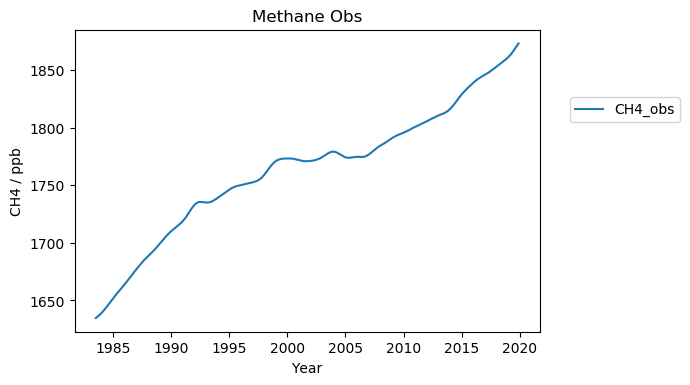

In [37]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(ch4_obs.iloc[:,2], ch4_obs.iloc[:,5], label=f'CH4_obs')

plt.legend(bbox_to_anchor=(1.05, 0.8))
plt.xlabel('Year')
plt.ylabel('CH4 / ppb')
plt.title(f'Methane Obs')

Text(0.5, 1.0, 'SSP pathways for methane')

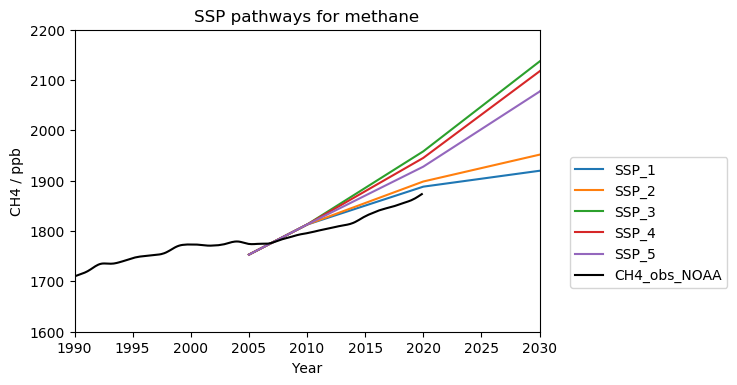

In [36]:
fig = plt.figure(dpi=100)
ax = plt.axes()

for i in range(5):
    ax.plot(ssp_paths.index, ssp_paths.iloc[:,i], label=f'{ssp_paths.columns.values[i]}')

ax.plot(ch4_obs.iloc[:,2], ch4_obs.iloc[:,5], label=f'CH4_obs_NOAA',c='k')

plt.legend(bbox_to_anchor=(1.05, 0.6))
ax.set_ylim(1600,2200)
ax.set_xlim(1990,2030)
plt.xlabel('Year')
plt.ylabel('CH4 / ppb')
plt.title(f'SSP pathways for methane')

Text(0.5, 1.0, 'SSP pathways for methane')

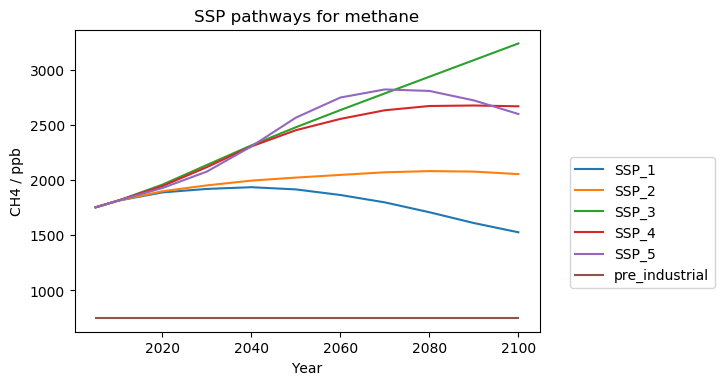

In [38]:
fig = plt.figure(dpi=100)
ax = plt.axes()

for i in range(6):
    ax.plot(ssp_paths.index, ssp_paths.iloc[:,i], label=f'{ssp_paths.columns.values[i]}')


plt.legend(bbox_to_anchor=(1.05, 0.6))
#ax.set_ylim(1600,2200)
#ax.set_xlim(1990,2030)
plt.xlabel('Year')
plt.ylabel('CH4 / ppb')
plt.title(f'SSP pathways for methane')

Text(0.5, 1.0, 'CH4 conc pathways')

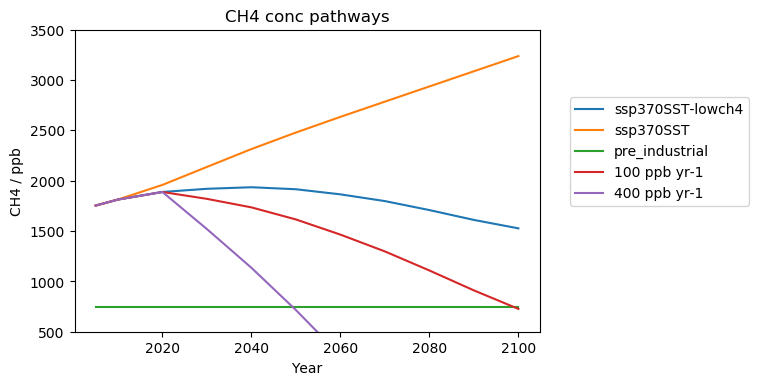

In [8]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(ssp_paths.index, ssp_paths.iloc[:,0], label=f'ssp370SST-lowch4')
ax.plot(ssp_paths.index, ssp_paths.iloc[:,2], label=f'ssp370SST')
ax.plot(ssp_paths.index, ssp_paths.iloc[:,5], label=f'{ssp_paths.columns.values[5]}')
ax.plot(ssp_paths.index, methane_rem_100, label=f'100 ppb yr-1')
ax.plot(ssp_paths.index, methane_rem_400, label=f'400 ppb yr-1')

ax.set_ylim(500,3500)
plt.legend(bbox_to_anchor=(1.05, 0.8))
plt.xlabel('Year')
plt.ylabel('CH4 / ppb')
plt.title(f'CH4 conc pathways')

In [9]:
ch4_rem_anthro = np.full((11), 750)
ch4_rem_all = np.full((11), 50)

In [11]:
ch4_rem_anthro[0:3] = low_ch4_pathway[0:3]
ch4_rem_all[0:3] = low_ch4_pathway[0:3]

Text(0.5, 1.0, 'CH4 conc pathways')

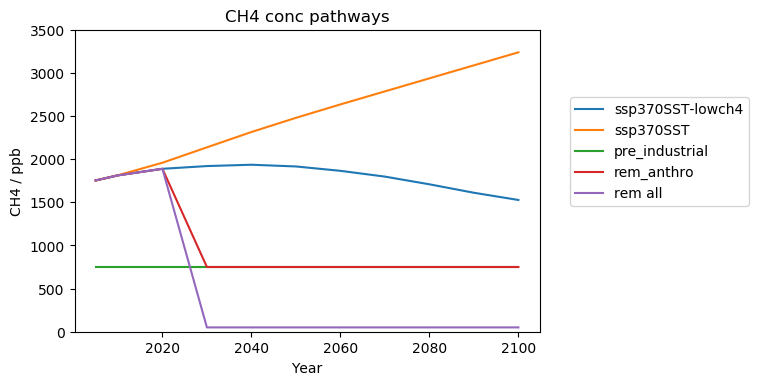

In [14]:
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(ssp_paths.index, ssp_paths.iloc[:,0], label=f'ssp370SST-lowch4')
ax.plot(ssp_paths.index, ssp_paths.iloc[:,2], label=f'ssp370SST')
ax.plot(ssp_paths.index, ssp_paths.iloc[:,5], label=f'{ssp_paths.columns.values[5]}')
#ax.plot(ssp_paths.index, methane_rem_100, label=f'100 ppb yr-1')
#ax.plot(ssp_paths.index, methane_rem_400, label=f'400 ppb yr-1')
ax.plot(ssp_paths.index, ch4_rem_anthro, label=f'rem_anthro')
ax.plot(ssp_paths.index, ch4_rem_all, label=f'rem all')

ax.set_ylim(0,3500)
plt.legend(bbox_to_anchor=(1.05, 0.8))
plt.xlabel('Year')
plt.ylabel('CH4 / ppb')
plt.title(f'CH4 conc pathways')